# MA3J8 Approximation Theory and Applications 

## 08b - Multivariate Approximation: Convergence Rates

We explore in some very simple cases the effect of choosing subset of the full tensor product Chebyushev basis. Due to software and algorithmic limitations, these tests will be restricted to very low dimension, just 2 and 3. But we can still observe some of our analytic result and more importantly how they are extremely limited. The take-away message is that approximation in high dimension is extremely subtle and requires substantially more work than in 1D.

In [1]:
using ApproxTools, PyCall, Plots, PyPlot
mplcolors = pyimport("matplotlib.colors")

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at none:0
└ @ Core none:0


PyObject <module 'matplotlib.colors' from '/Users/ortner/.local/lib/python2.7/site-packages/matplotlib/colors.pyc'>

In [14]:
function greedy(p, M)
    q = deepcopy(p)
    I = sortperm(abs.(p.coeffs[:]), rev=true)
    q.coeffs[I[M+1:end]] .= 0.0
    return q 
end

function sparsify(p, accfun)
    q = deepcopy(p)
    M = 0
    for k in CartesianIndices(q.coeffs)
        if accfun(Tuple(k))
            M += 1
        else 
            q.coeffs[k] .= 0.0
        end 
    end
    return q, M
end 

sparsegrid(p, N) = sparsify(p, k -> (sum(k) <= N))

hcross(p, N) = sparsify(p, k -> (prod(1 .+ k) <= N+1))


hcross (generic function with 1 method)

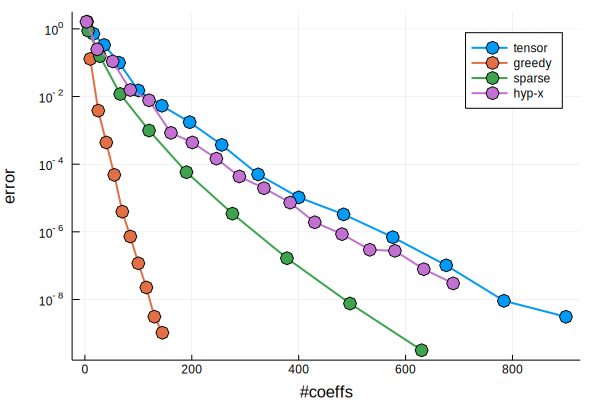

In [15]:
f2(x1,x2) = exp(x1*sin(3*x2))

NN = 2:2:30
NNsp = 4:4:36
NNhc = 5:12:200
MM = [] 
MM_gr = 10:15:150
MM_sp = []
MM_hc = []
err_ten = []
err_gr = [] 
err_sp = [] 
err_hc = [] 
for N in NN 
    p_ten = approximate(f2, Chebyshev(N))
    push!(err_ten, fnorm(f2, p_ten, 201))
    push!(MM, length(p_ten.coeffs))
end 
for M in MM_gr 
    p_ten = approximate(f2, Chebyshev(3*ceil(Int, sqrt(M))))
    p_gr = greedy(p_ten, M)
    push!(err_gr, fnorm(f2, p_gr, 201))
end 
for N in NNsp 
    p_ten = approximate(f2, Chebyshev(N))
    p_sp, M1 = sparsegrid(p_ten, N)
    push!(err_sp, fnorm(f2, p_sp, 201))
    push!(MM_sp, M1)
end
for N in NNhc 
    p_ten = approximate(f2, Chebyshev(N))
    p_hc, M2 = hcross(p_ten, N)
    push!(err_hc, fnorm(f2, p_hc, 201))
    push!(MM_hc, M2)
end


Plots.plot(; yaxis = (:log,"error"), xlabel="#coeffs" )
plot!(MM, err_ten, lw=2, m=:o, ms=6, label="tensor")
plot!(MM_gr, err_gr, lw=2, m=:o, ms=6, label="greedy")
plot!(MM_sp, err_sp, lw=2, m=:o, ms=6, label ="sparse")
plot!(MM_hc, err_hc, lw=2, m=:o, ms=6, label ="hyp-x")

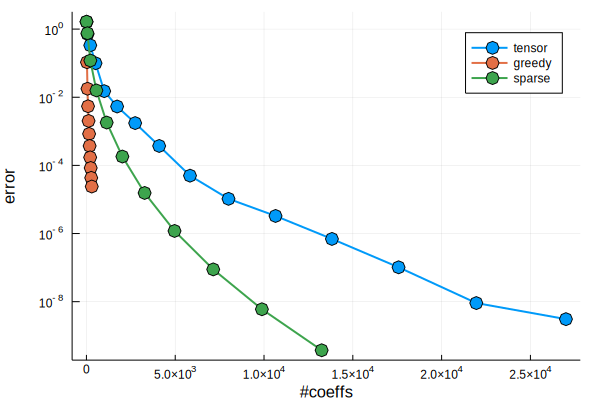

In [16]:
f3(x1,x2,x3) = exp(x1*sin(3*x2)*x3^2)

NN = 2:2:30
NNsp = 4:4:44
MM = [] 
MM_gr = 30:30:300
MM_sp = []
MM_hc = []
err_ten = []
err_gr = [] 
err_sp = [] 
err_hc = [] 
for N in NN 
    p_ten = approximate(f3, Chebyshev(N))
    push!(err_ten, fnorm(f3, p_ten, 201))
    push!(MM, length(p_ten.coeffs))
end 
for M in MM_gr 
    p_ten = approximate(f3, Chebyshev(2*ceil(Int, sqrt(M))))
    p_gr = greedy(p_ten, M)
    push!(err_gr, fnorm(f3, p_gr, 201))
end 
for N in NNsp 
    p_ten = approximate(f3, Chebyshev(N))
    p_sp, M1 = sparsegrid(p_ten, N)
    push!(err_sp, fnorm(f3, p_sp, 201))
    push!(MM_sp, M1)
end

Plots.plot(; yaxis = (:log,"error"), xlabel="#coeffs" )
plot!(MM, err_ten, lw=2, m=:o, ms=6, label="tensor")
plot!(MM_gr, err_gr, lw=2, m=:o, ms=6, label="greedy")
plot!(MM_sp, err_sp, lw=2, m=:o, ms=6, label ="sparse")

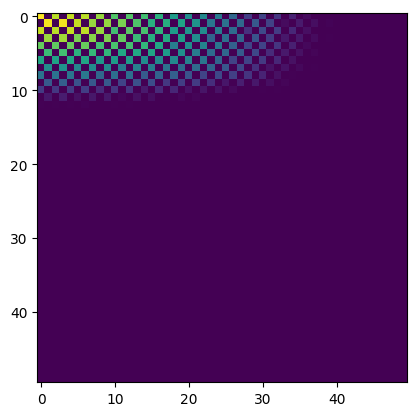

PyObject <matplotlib.image.AxesImage object at 0x130c4a750>

In [17]:
# We can visualise the decay of the Chebyshev coefficients - at least in 2D:
p = approximate(f2, Chebyshev(50)) 
imshow(1e-12 .+ abs.(coeffs(p)), norm=mplcolors.LogNorm())

Another example: the multi-variate Runge function 
$$
f(x) = \frac{1}{1+c |x|^2},
$$
where $|x|$ is the 2-norm.

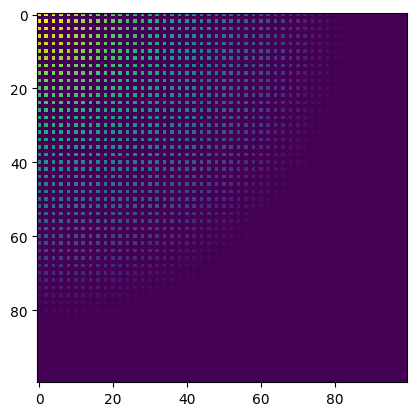

PyObject <matplotlib.image.AxesImage object at 0x130c77050>

In [18]:
# this time, let us start by visualising the chebyshev coefficients right away:
fr2(x1, x2) = 1 / (1+10*(x1^2+x2^2))
p = approximate(fr2, Chebyshev(100))
imshow(1e-12 .+ abs.(coeffs(p)), norm=mplcolors.LogNorm())

We clearly observe a radial decay of the Chebyshev coefficients! Thus suggests that we should truncate at $|k| \leq N$ where $|k|$ is the 2-norm!

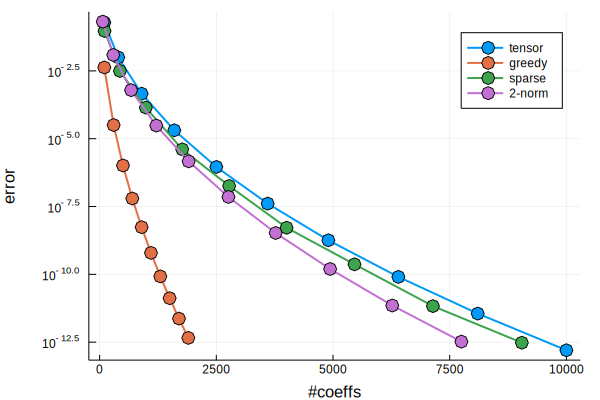

In [19]:
NN = 10:10:100
NNsp = 15:15:140
NN2 = 10:10:100
MM = [] 
MM_gr = 100:200:2000
MM_sp = []
MM_2 = []
err_ten = []
err_gr = [] 
err_sp = [] 
err_2 = [] 
for N in NN 
    p_ten = approximate(fr2, Chebyshev(N))
    push!(err_ten, fnorm(fr2, p_ten, 201))
    push!(MM, length(p_ten.coeffs))
end 
for M in MM_gr 
    p_ten = approximate(fr2, Chebyshev(3*ceil(Int, sqrt(M))))
    p_gr = greedy(p_ten, M)
    push!(err_gr, fnorm(fr2, p_gr, 201))
end 
for N in NNsp 
    p_ten = approximate(fr2, Chebyshev(N))
    p_sp, M1 = sparsegrid(p_ten, N)
    push!(err_sp, fnorm(fr2, p_sp, 201))
    push!(MM_sp, M1)
end
for N in NN2
    p_ten = approximate(fr2, Chebyshev(N))
    p_hc, M = sparsify(p_ten, k -> sum(abs2, k) < N^2)
    push!(err_2, fnorm(fr2, p_hc, 201))
    push!(MM_2, M)
end


Plots.plot(; yaxis = (:log,"error"), xlabel="#coeffs" )
plot!(MM, err_ten, lw=2, m=:o, ms=6, label="tensor")
plot!(MM_gr, err_gr, lw=2, m=:o, ms=6, label="greedy")
plot!(MM_sp, err_sp, lw=2, m=:o, ms=6, label ="sparse")
plot!(MM_2, err_2, lw=2, m=:o, ms=6, label ="2-norm")

Most of the gain in the previous exampe comes from the factor 
due to ignoring the zero coefficients that arise due to symmetry.

As a final example we consider a function that arises in transport theory. Specifically, we consider functions of the form 
$$
  f(x_1, x_2) = \frac{g(x_1, x_2)}{x_1 - x_2 + \epsilon i},
$$
where $\eta i$ is a small shift into the complex plane and $g$ is smooth. For small $\epsilon$ $f$ has a singularity very close in the complex plane, or in fact an entire line of singularities and this significantly slows approximation. 

The function is then used to evaluate a bivariate matrix function, i.e., 
$$
  f(H, H)
$$
where $H \in \mathbb{R}^{n \times n}$ with $n$ potentially large. We have to be careful about how to interpret this function. A canonical definition is via tensor products. If $f(x_1, x_2) = f_1(x_1) f_2(x_2)$, then $f(H, H) = f_1(H) \otimes f_2(H)$, which is 
a fours-dimensional tensor. Then, invoking linearity, if $f$ is a sum of tensor products, e.g., $f(x_1,x_2) = \sum_k c_k T_{k_1}(x_1) T_{k_2}(x_2)$, we can write 
$$
    f(H,H) = \sum_k c_k T_{k_1}(H) \otimes T_{k_2}(H).
$$
We may again employ the recursion formula for the Chebyshev basis to evaluate the basis. But even without going into the details it is clear that it will be crucial to minimise the number of terms!

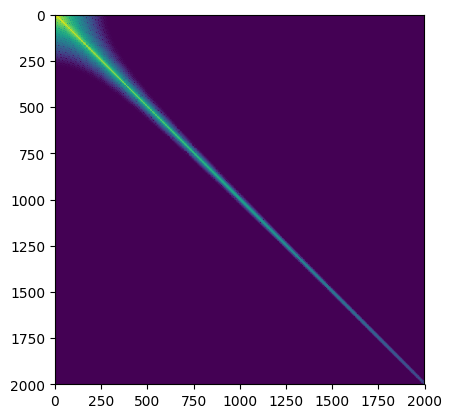

PyObject <matplotlib.image.AxesImage object at 0x12b99b990>

In [20]:
# the following picture shows significant potential for 
# sparsification!
ft(x1,x2) = 1/(x1 - x2 + 0.01im)
p = approximate(ft, Chebyshev(2000)) 
imshow(1e-12.+abs.(coeffs(p)), norm=mplcolors.LogNorm())

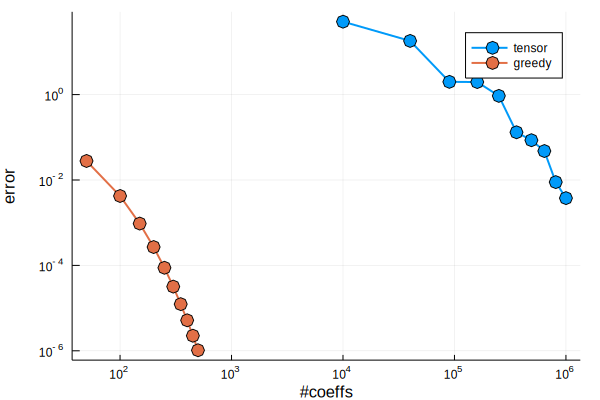

In [21]:
# there is no sign here of a sparse grid or 
# hyperbolic cross like structure so we go straight for the 
# greedy approximation. This is justified in this case, 
# where the real cost is the evaluation!

NN = 100:100:1000
MM = [] 
MM_gr = 50:50:500
err_ten = []
err_gr = [] 
for N in NN 
    p_ten = approximate(ft, Chebyshev(N))
    push!(err_ten, fnorm(ft, p_ten, 201))
    push!(MM, length(p_ten.coeffs))
end 
p_ten = approximate(fr2, Chebyshev(2000))
for M in MM_gr 
    p_gr = greedy(p_ten, M)
    push!(err_gr, fnorm(fr2, p_gr, 201))
end 

Plots.plot(; yaxis = (:log,"error"), xaxis=(:log, "#coeffs") )
plot!(MM, err_ten, lw=2, m=:o, ms=6, label="tensor")
plot!(MM_gr, err_gr, lw=2, m=:o, ms=6, label="greedy")